In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

This notebook quickly shows the utility of tracking function evaluations. The simple funtion used came from here:

https://stackoverflow.com/questions/47381835/scipy-minimize-get-cost-function-vs-iteration

In [3]:
# A parameter that will track the number of times we have called the cost function
global calls
calls = 0

# A list of the parameters each time the cost function is called
global param
param = []

def fun(x):
  global param
  global calls
  global current_cost
  calls += 1
  current_cost = x[0]**2 - 2*x[0] + x[1]**4
  param = x
  return current_cost

# Callback function
def logcost(x):
    cost_log.append([calls,param,current_cost])
    
cost_log = []
minimize(fun, [3, 2],callback=logcost)

      fun: -0.9999999826618468
 hess_inv: array([[ 4.98239620e-01, -8.20198925e-05],
       [-8.20198925e-05,  2.65219906e+02]])
      jac: array([1.49011612e-08, 6.04242086e-06])
  message: 'Optimization terminated successfully.'
     nfev: 80
      nit: 18
     njev: 20
   status: 0
  success: True
        x: array([1.        , 0.01147495])

In [4]:
cost_log

[[8, array([2.87472492, 0.99779936]), 3.5058199763814986],
 [16, array([0.94613606, 0.934064  ]), -0.2358850818406083],
 [20, array([0.96844879, 0.81350025]), -0.5610482268832008],
 [24, array([1.00001578, 0.57883118]), -0.88774448831044],
 [28, array([1.00006263, 0.44669955]), -0.9601835896374596],
 [32, array([1.00000035, 0.33431894]), -0.9875076570293674],
 [36, array([0.99999984, 0.2532019 ]), -0.9958897536899377],
 [40, array([0.99999999, 0.19089413]), -0.9986720850146886],
 [44, array([1.        , 0.14417203]), -0.9995679599485247],
 [48, array([1.        , 0.10881181]), -0.9998598141413761],
 [52, array([0.99999998, 0.08214551]), -0.99995446605427],
 [56, array([0.99999999, 0.06200813]), -0.9999852159161118],
 [60, array([0.99999999, 0.04680897]), -0.999995199170893],
 [64, array([1.        , 0.03533521]), -0.9999984410557426],
 [68, array([0.99999998, 0.02667357]), -0.9999994937970043],
 [72, array([0.99999999, 0.02013596]), -0.9999998356048524],
 [76, array([0.99999999, 0.0151

Here, the left column shows the number of function evaluations that have been performed up to the given iteration; the middle column shows the parameters at that iteration; and the right column gives the cost function value.

In [11]:
fevals = [entry[0] for entry in cost_log]
param1 = [entry[1][0] for entry in cost_log]
param2 = [entry[1][1] for entry in cost_log]

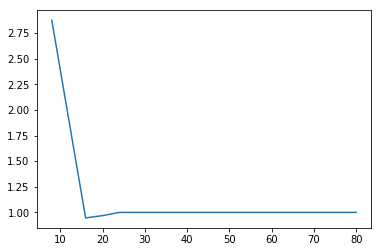

In [15]:
plt.plot(fevals,param1)
plt.show()

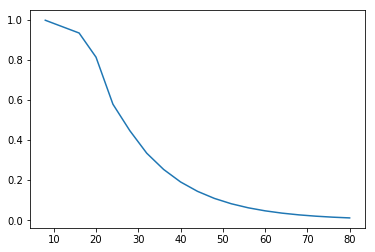

In [16]:
plt.plot(fevals,param2)
plt.show()

We see that the solver spends a long time tweaking parameter 2, and moreover to very little effect - the cost function value hardly changes after the first few iterations.